In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [67]:
market=pd.read_excel('Market_Portfolio.xlsx',header=0,names=range(0,2))
industry=pd.read_excel('Industry_Portfolios.xlsx',header=0,names = range(0,11))


#### Regress the monthly excess returns for each of the ten industry portfolios on the monthly excess returns for the market portfolio, so as to estimate the intercept coefficient (alpha) and slope coefficient (beta) for each of the ten industry portfolios.Create a table showing the intercept and slope coefficients for the ten industry portfolios

In [68]:
Rf=0.13
excess_market= np.array(market[1])-Rf
alpha=[]
beta=[]
for i in range(1,11):
    excess_asset=np.array(industry[i])-Rf
    reg=np.polyfit(excess_market,excess_asset,deg=1)
    alpha=alpha+[reg[1]]
    beta=beta+[reg[0]]
print(alpha)
print(beta)
a=np.matrix(alpha).T
b=np.matrix(beta).T
alpha_table= pd.DataFrame(a.T,columns=['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth', 'Utils', 'Other'],index=["alpha"])
beta_table= pd.DataFrame(b.T,columns=['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth', 'Utils', 'Other'],index=["beta"])
display(alpha_table)
display(beta_table)

[0.36944288006820153, -0.4155990763168844, 0.1597708349575717, 0.5017185727422063, -0.06401952750987767, 0.19469092881013042, 0.27549215482708167, 0.23784118712422314, 0.444584616276969, -0.3871345212123553]
[0.652647355963541, 1.648535649966647, 1.1698462964148781, 0.9698499564640055, 1.1329694391423129, 0.9007292509476117, 0.8264924015201599, 0.6730356956329144, 0.5380861001316399, 1.2073094586151105]


,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
alpha,0.369443,-0.415599,0.159771,0.501719,-0.06402,0.194691,0.275492,0.237841,0.444585,-0.387135


,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
beta,0.652647,1.648536,1.169846,0.96985,1.132969,0.900729,0.826492,0.673036,0.538086,1.207309


#### Briefly explain the economic significance of the intercept and slope coefficients.

>Alpha depends on the portfolio itself called unsystemic risk.
while Beta represents degree of asset’s exposure to market risk. It considers as the systemic risk of a portfolio. When the market goes up, the contribution of this part to the portfolio is positive. When the market goes down, the return of portfolio declines with the market.

#### Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio. Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding betas (by construction, the market portfolio has beta of one). This will give you the slope and intercept coefficients for the SML. 

In [69]:
mean_industry=np.mean(industry,axis=0)


In [70]:
mean_industry=np.array(mean_industry[1:11])
mean_market=np.array(np.mean(market[1]))
print(mean_industry)
print(mean_market)
print(beta)
beta=beta+[1]
mean_industry=np.hstack([mean_industry,mean_market])
reg1=np.polyfit(beta,mean_industry,deg=1)


[0.90283333 0.73333333 1.01283333 1.23116667 0.76625    0.88141667
 0.91633333 0.78383333 0.90716667 0.48908333]
0.7480833333333334
[0.652647355963541, 1.648535649966647, 1.1698462964148781, 0.9698499564640055, 1.1329694391423129, 0.9007292509476117, 0.8264924015201599, 0.6730356956329144, 0.5380861001316399, 1.2073094586151105]


#### Using the estimated slope and intercept coefficients, plot the SML in the range of beta from zero to two on the horizontal axis. Also plot the positions of the ten industry portfolios and the market portfolio. 

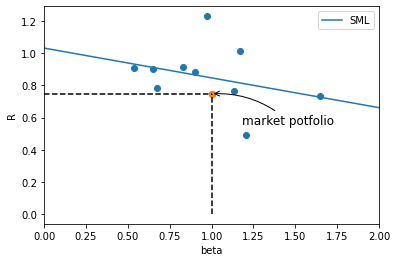

In [73]:
fig=plt.figure()

plt.xlim(0,2)
plt.xlabel('beta')
plt.ylabel('R')
# scatter
plt.scatter(beta,mean_industry)
#market portfolio
plt.scatter(1,mean_market)
plt.plot([1,1],[0,mean_market],'k--')
plt.plot([0,1],[mean_market,mean_market],'k--')
plt.annotate(r'market potfolio', xy=(1, mean_market), xycoords='data', xytext=(+30, -30), textcoords='offset points', fontsize=12,arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2') ) 
#SML
x=np.linspace(0,2,100)
y=reg1[1]+reg1[0]*x
plt.plot(x,y,label='SML')
plt.legend()
plt.show()

#### Briefly explain the economic significance of the SML.

>The securities market line provides a detailed description of the relationship between expected return and risk of securities portfolio. The expected return of any portfolios consists of two parts: one is risk-free rate and the other is [E(rp)-Rf].<br>
If any portfolio falls above SML, which has a higher treynor ratio, all investor will want to buy and price will rise up,casuing return to drop and eventually falls on SML <br>
Risk-free rate can be considered as compensation for the abandonment of immediate consumption.<br>
[E(rp)-Rf] is known as risk premium. It is proportional to the magnitude of risk that is due to beta. Risk premium represents the compensation for unit risk, as know as the price of risk.<br>
